In [1]:
# General imports
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sklearn imports
from sklearn.metrics import confusion_matrix

# Import library with current code functions
sys.path.append(os.path.join("..", "lib"))
import neural_network_functions as neural_net_fun
import general_functions as gf

In [2]:
# Check if TensorFlow can find the GPU
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("TensorFlow found the following GPU(s):")
    for device in physical_devices:
        print(device)
else:
    print("No GPU found. TensorFlow is running on the CPU.")

TensorFlow found the following GPU(s):
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
def make_inferences(model, label_mapping, X_complete, Y_complete):
    # Generate predictions for the entire dataset
    predictions = model.predict(X_complete)
    
    # Create a list to store the inference results
    inferences_result = []
    
    for i, (prediction, true_label) in enumerate(zip(predictions, Y_complete)):
        # Get the index of the class with the highest confidence
        predicted_index = np.argmax(prediction)
        
        # Map indices to class labels
        predicted_emotion = list(label_mapping.keys())[predicted_index]
        true_emotion = list(label_mapping.keys())[true_label]
        confidence = prediction[predicted_index]
        
        # Store the result for this sample
        result = {
            "Sample": i,
            "Predicted Emotion": predicted_emotion,
            "True Emotion": true_emotion,
            "Confidence": confidence
        }
        
        inferences_result.append(result)
    
    return inferences_result

In [4]:
def plot_confusion_matrix(inferences_result, label_mapping):
    # Convert inferences_result to a DataFrame
    inferences_df = pd.DataFrame(inferences_result)
    
    # Map emotions to their integer indices
    true_labels = inferences_df["True Emotion"].map(label_mapping)
    predicted_labels = inferences_df["Predicted Emotion"].map(label_mapping)
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=list(label_mapping.values()))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


In [5]:
def plot_confidence_levels(inferences_result):
    # Convert inferences_result to a DataFrame
    inferences_df = pd.DataFrame(inferences_result)
    
    # Plot confidence levels for each sample
    plt.figure(figsize=(12, 6))
    plt.plot(inferences_df["Sample"], inferences_df["Confidence"], marker="o", linestyle="-", color="purple")
    plt.xlabel("Sample Index")
    plt.ylabel("Confidence Level")
    plt.title("Confidence Levels for Each Inference")
    plt.ylim(0, 1)  # Confidence is typically between 0 and 1
    plt.grid(True)
    plt.show()

In [6]:
def plot_confidence_levels_by_emotion(inferences_result):
    inferences_df = pd.DataFrame(inferences_result)
    
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(inferences_df["Sample"], inferences_df["Confidence"],
                          c=pd.factorize(inferences_df["True Emotion"])[0], cmap="viridis", alpha=0.7)
    plt.xlabel("Sample Index")
    plt.ylabel("Confidence Level")
    plt.title("Confidence Levels by True Emotion")
    plt.ylim(0, 1)
    plt.colorbar(scatter, label="True Emotion")
    plt.show()

In [7]:
inference_dataset_list = gf.find_files_in_all_subdirectories([os.path.join('.', 'result_sequences')], '*.CSV')
print("Inference Datasets available: ", inference_dataset_list)

Inference Datasets available:  ['.\\result_sequences\\DATASET_SEQUENCES_1.CSV', '.\\result_sequences\\DATASET_SEQUENCES_CK+.CSV']


In [8]:
INFERENCE_DATASET_SELECTED = inference_dataset_list[1]
INFERENCE_DATASET_SELECTED

'.\\result_sequences\\DATASET_SEQUENCES_CK+.CSV'

In [9]:
data_info = neural_net_fun.preprocess_data_current_dataset(INFERENCE_DATASET_SELECTED, emotions = "label == 'happy' | label == 'surprise'")

batch_size = 32

label_mapping = data_info['label_mapping']
timesteps = data_info['timesteps']
n_classes = data_info['n_classes']
n_features = data_info['n_features']

X_before_balancing = data_info['X_complete_before_balancing']
Y_before_balancing = data_info['Y_complete_before_balancing']

X_complete = data_info['X_complete']
Y_complete = data_info['Y_complete']

X_train = data_info['X_train']
X_val = data_info['X_val']
X_test = data_info['X_test']

Y_train = data_info['Y_train']
Y_val = data_info['Y_val']
Y_test = data_info['Y_test']

print(f"Number of neutral samples: {list(Y_complete).count(1)}")
print(f"Number of happy samples: {list(Y_complete).count(0)}")

Label Mapping: {'happy': 0, 'surprise': 1}
Features being used: ['m4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'm16', 'm17', 'e1', 'e2', 'e3', 'b1', 'b2', 'b3', 'label_measures', 'label']


TypeError: '<=' not supported between instances of 'float' and 'str'

In [ ]:
neural_net_fun.checking_data(label_mapping, timesteps, n_classes, n_features, X_before_balancing, Y_before_balancing, X_complete, Y_complete, X_train, X_val, X_test, Y_train, Y_val, Y_test)

===== Data Information =====
Timesteps: 31
Number of classes: 2
Number of features: 22

===== Label Mapping =====
'happy' -> 0
'neutral' -> 1

===== Data Before Balancing =====
Shape of X: (3046, 31, 22)
Shape of Y: (3046,)
Sample count per class:
Class 'happy' (Value 0): 1138 samples
Class 'neutral' (Value 1): 1908 samples

===== Data After Balancing =====
Shape of X: (2276, 31, 22)
Shape of Y: (2276,)
Sample count per class:
Class 'happy' (Value 0): 1138 samples
Class 'neutral' (Value 1): 1138 samples

===== Training Set =====
Shape of X_train: (1592, 31, 22)
Shape of Y_train: (1592, 1)
Class 'happy' (Value 0): 796 samples
Class 'neutral' (Value 1): 796 samples

===== Validation Set =====
Shape of X_val: (342, 31, 22)
Shape of Y_val: (342, 1)
Class 'happy' (Value 0): 171 samples
Class 'neutral' (Value 1): 171 samples

===== Test Set =====
Shape of X_test: (342, 31, 22)
Shape of Y_test: (342, 1)
Class 'happy' (Value 0): 171 samples
Class 'neutral' (Value 1): 171 samples


In [ ]:
model = tf.keras.models.load_model("model.keras")

In [ ]:
inferences_result = make_inferences(model, label_mapping, X_complete, Y_complete)

72/72 [==============================] - 2s 2ms/step


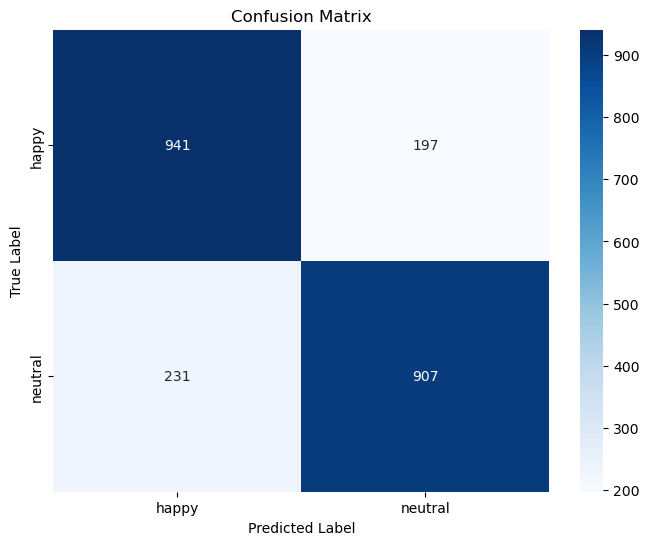

In [ ]:
plot_confusion_matrix(inferences_result, label_mapping)

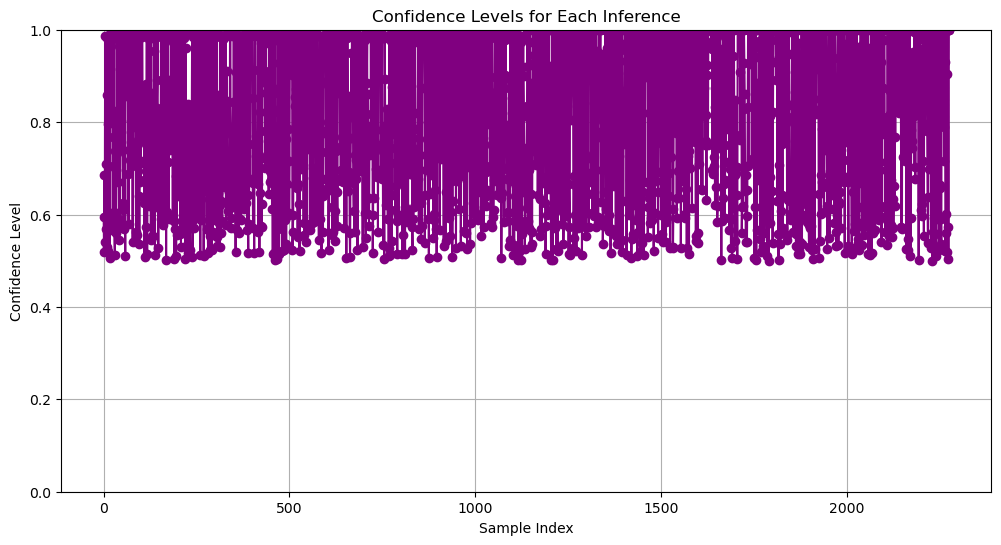

In [ ]:
plot_confidence_levels(inferences_result)

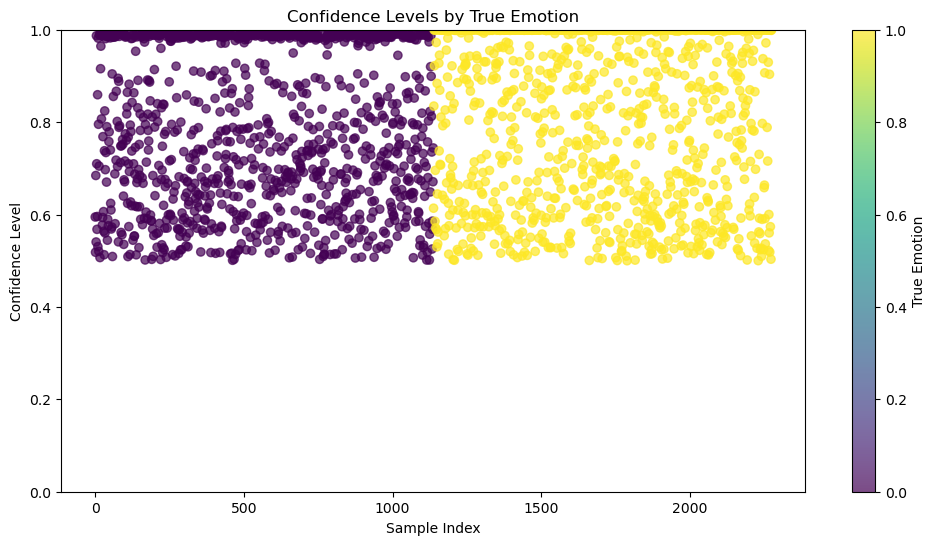

In [ ]:
plot_confidence_levels_by_emotion(inferences_result)